In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# drop deck as it has many NAN
# drop duplicates  
# drop alive , alone , adult_male as they are redundant
# merge sibsp and parch to one feature called family_size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# drop deck as it has many NAN
# drop duplicates  
# drop alive , alone , adult_male as they are redundant
# merge sibsp and parch to one feature called family_size
df = df.drop(columns=['deck', 'alive', 'alone', 'adult_male' , 'class' , 'embark_town','who'])
df['family_size'] = df['sibsp'] + df['parch']
df = df.drop(columns=['sibsp', 'parch'])
df.duplicated().sum()

np.int64(112)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            103
fare             0
embarked         2
family_size      0
dtype: int64

In [9]:
df['age'].fillna(df['age'].mean() , inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0] , inplace=True)
df.isnull().sum()

C:\Users\mosta\AppData\Local\Temp\ipykernel_23980\2117171674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean() , inplace=True)
C:\Users\mosta\AppData\Local\Temp\ipykernel_23980\2117171674.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

survived       0
pclass         0
sex            0
age            0
fare           0
embarked       0
family_size    0
dtype: int64

In [10]:
df.head()

,survived,pclass,sex,age,fare,embarked,family_size
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [11]:
# encoding categorical features sex , embarked
df = pd.get_dummies(df , columns=['sex' , 'embarked'] , drop_first=True)
df.head()

,survived,pclass,age,fare,family_size,sex_male,embarked_Q,embarked_S
0,0,3,22.0,7.2500,1,True,False,True
1,1,1,38.0,71.2833,1,False,False,False
2,1,3,26.0,7.9250,0,False,False,True
3,1,1,35.0,53.1000,1,False,False,True
4,0,3,35.0,8.0500,0,True,False,True


In [12]:
x = df.drop(columns=['survived'])
y = df['survived']

In [13]:
# make sure data is balanced
y.value_counts()

survived
0    458
1    321
Name: count, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
numirical = ['age', 'fare', 'family_size']
X_train[numirical] = scaler.fit_transform(X_train[numirical])
X_test[numirical] = scaler.transform(X_test[numirical])

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 82.05128205128204


Text(0.5, 1.0, 'Confusion Matrix')

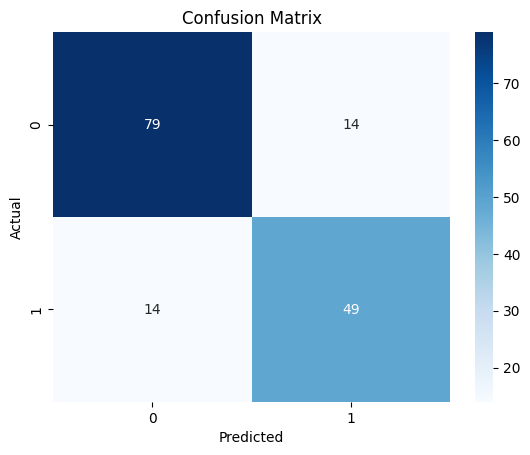

In [16]:
# measurement
accuracy = accuracy_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
